In [72]:
import numpy as np
import time
import matplotlib.pyplot as plt
import numpy.linalg as la

def converge(f,x):
    h,e,t,tol,it_count = 1,1,0,0.00000001,500
    while e > tol and t < it_count:
        e = f(x+h) - f(x)
        v = e/h
        h = 0.5*h
        t = t + 1
    if t >= it_count:
        return "Derivative couldn't be computed"
    return v

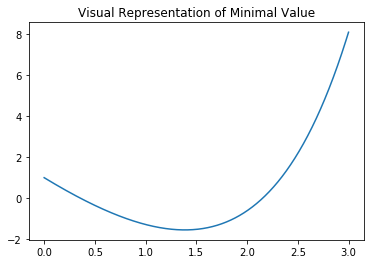

In [73]:
def f(x):
    return np.exp(x) -4*x

grid = np.linspace(0,3,1000)
fgrid = [f(x) for x in grid]
plt.plot(grid,fgrid)
plt.title("Visual Representation of Minimal Value")
plt.show()

Question #1

In [77]:
def prob1(f,a,b,n):
    p = 0.382
    for i in range(n):
        ap = a + p*(b - a)
        bp = a + (1 - p)*(b - a)
        if f(ap) >= f(bp):
            a,b = ap,b
        else:
            a,b = a,bp
    result = (a + b)/2
    return (a,b),result

start = time.time()
interval, result = prob1(f,0,3,50)
print(interval)
print(result)
print("Took ",time.time()-start," seconds")

(1.3862943787618156, 1.3862943788681183)
1.3862943788149669
Took  0.0010030269622802734  seconds


Question #2

In [44]:
def prob2(f,a,b,n):
    for i in range(n):
        m = (a + b)/2
        s = converge(f,m)
        if s > 0:
            a,b = a,m
        else:
            a,b = m,b
    result = (a + b)/2
    return (a,b),result

start = time.time()
interval, result = prob2(f,0,3,50)
print(interval)
print(result)
print("Took ",time.time()-start," seconds")
# Note: this takes much longer as written, but if the closed form for f'(x) is directly plugged in it takes less than prob1.

(1.3862333253428645, 1.3862333253428671)
1.3862333253428658
Took  0.003007650375366211  seconds


Problem #3

In [60]:
g = lambda x: x**2 + np.sin(5*x)
g1= lambda x: 2*x  + 5*np.cos(5*x)
g2= lambda x: 2 - 25*np.sin(5*x)

def prob3(g,g1,g2,x0):
    tol = 0.0001
    n = 500
    t = 0
    x = x0 - (g1(x0) / g2(x0))
    while abs(x - x0) > tol and t < n:
        x0 = x.copy()
        x = x0 - (g1(x0) / g2(x0))
        t = t + 1
    if t >= n:
        x = "Did Not Converge"
    return x,t

start = time.time()
result,its = prob3(g,g1,g2,0)
print("Result (x0 = 0):",result)
print("Time Taken: ",time.time()-start,"seconds")
print("Iterations:",its)
print("--------------------------------------------------------------------------")
start2 = time.time()
result2,its2 = prob3(g,g1,g2,10)
print("Result (x0 = 10):",result2)
print("Time Taken: ",time.time()-start2,"seconds")
print("Iterations:",its2)
print("--------------------------------------------------------------------------")
start22 = time.time()
result22,its22 = prob3(g,g1,g2,-10)
print("Result (x0 = 10):",result22)
print("Time Taken: ",time.time()-start22,"seconds")
print("Iterations:",its22)

Result (x0 = 0): -1.4473142258
Time Taken:  0.0015041828155517578 seconds
Iterations: 46
--------------------------------------------------------------------------
Result (x0 = 10): Did Not Converge
Time Taken:  0.004014730453491211 seconds
Iterations: 500
--------------------------------------------------------------------------
Result (x0 = 10): Did Not Converge
Time Taken:  0.004011392593383789 seconds
Iterations: 500


Question #4

In [69]:
h = lambda x: x**2 + np.sin(x) + np.sin(10*x)
h1= lambda x: 2*x  + np.cos(x) + 10*np.cos(10*x)

def prob4(f,f1,x0,x1):
    tol = 0.0001
    n = 500
    t = 0
    x = x1 - ((x1 - x0) / (f1(x1) - f1(x0))) * f1(x1)
    while abs(x - x1) > tol and t < n:
        x0,x1 = x1,x.copy()
        x = x1 - ((x1 - x0) / (f1(x1) - f1(x0))) * f1(x1)
        t = t + 1
    if t >= n:
        x = "Did Not Converge"
    return x,t

start = time.time()
result,its = prob4(h,h1,0,-1)
print("Result (x0 = 0, x1 = -1):",result)
print("Time Taken: ",time.time()-start,"seconds")
print("Iterations:",its)
print("--------------------------------------------------------------------------")
start = time.time()
result,its = prob4(h,h1,0,-10)
print("Result (x0 = 0, x1 = -10):",result)
print("Time Taken: ",time.time()-start,"seconds")
print("Iterations:",its)
print("--------------------------------------------------------------------------")
start = time.time()
result,its = prob4(h,h1,4,-1)
print("Result (x0 = 4, x1 = -1):",result)
print("Time Taken: ",time.time()-start,"seconds")
print("Iterations:",its)

Result (x0 = 0, x1 = -1): -0.163677218465
Time Taken:  0.0010023117065429688 seconds
Iterations: 7
--------------------------------------------------------------------------
Result (x0 = 0, x1 = -10): -1.38749008336
Time Taken:  0.0010023117065429688 seconds
Iterations: 15
--------------------------------------------------------------------------
Result (x0 = 4, x1 = -1): 1.69460850437
Time Taken:  0.0 seconds
Iterations: 8


Problem #5

In [71]:
def prob5(f,f1,x,p):
    alpha = 1
    rho   = 0.5
    c     = 0.5
    grad  = f(x) + c*alpha*f1(x)*p
    t,tot = 1,100
    while f(x + alpha*p) > grad and t < tot:
        alpha = rho*alpha
        t = t + 1
    return f(x + alpha*p)